## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [72]:
df_rest = pd.read_csv('Zomato Restaurant names and Metadata.csv')

In [73]:
df_reviews = pd.read_csv('Zomato Restaurant reviews.csv')

## Exploring both the datasets.

In [74]:
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [75]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [76]:
df_rest.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [77]:
type(df_rest['Cuisines'][0])

str

In [78]:
df_rest.shape

(105, 6)

In [79]:
df_rest['Cuisines'][0]

'Chinese, Continental, Kebab, European, South Indian, North Indian'

In [80]:
df_reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [81]:
len(df_reviews['Restaurant'].unique())

100

In [82]:
len(df_rest['Name'].unique())

105

## As we can see from here there are 105 unique restaurants in first table and 100 unique restaurants in second table, So we will have 100 unique reataurants after we merge both the tables, if needed.

## We are going to drop the Links Column because no info is provided relative to the project.

In [83]:
df_rest.drop('Links',axis=1,inplace = True)

## We are also going to drop the Collections column as more than 50% of data is null.

In [84]:
df_rest[~df_rest['Collections'].isna()]

,Name,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
5,The Fisherman's Wharf,"1,500","Sunday Brunches, Corporate Favorites, Great Bu...","Seafood, Goan, North Indian, Continental, Asian","12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30P..."
6,eat.fit,500,Food Hygiene Rated Restaurants in Hyderabad,"Healthy Food, North Indian, Continental, South...",7 AM to 10 PM
8,Hyper Local,"1,000","Great Buffets, Live Sports Screenings, Best Ba...","American, Chinese, North Indian, Kebab, South ...",12 Noon to 12 Midnight
9,Cream Stone,350,Frozen Delights,"Ice Cream, Desserts","10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri..."
10,Sardarji's Chaats & More,400,"Street Food, Veggie Friendly, Pocket Friendly","Street Food, North Indian, Fast Food","12 Noon to 3:30 PM, 7 PM to 10:30 PM"


In [85]:
df_rest.drop('Collections',axis=1,inplace=True)

In [86]:
df_rest['Timings'].unique()

array(['12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)', '11 AM to 11 PM',
       '11:30 AM to 4:30 PM, 6:30 PM to 11 PM', '12 Noon to 2 AM',
       '12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12noon to 12midnight (Fri-Sat)',
       '12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30PM (Mon, Tue, Wed, Thu, Sun), 12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 12Midnight (Fri-Sat)',
       '7 AM to 10 PM', '12 Noon to 12 Midnight',
       '10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri-Sun)',
       '12 Noon to 3:30 PM, 7 PM to 10:30 PM',
       '12 Noon to 3:30 PM, 6:30 PM to 11:30 PM', '11:30 AM to 1 AM',
       '12noon to 12midnight (Mon-Sun)',
       '12 Noon to 4:30 PM, 6:30 PM to 11:30 PM', '12 Noon to 10:30 PM',
       '12 Noon to 11 PM', '12:30 PM to 10 PM (Tue-Sun), Mon Closed',
       '11:30 AM to 3 PM, 7 PM to 11 PM',
       '11am to 11:30pm (Mon, Tue, Wed, Thu, Sun), 11am to 12midnight (Fri-Sat)',
       '10 AM to 5 AM',
       '12 Noon to 12 Midnight (Mon-Thu, Sun), 12 Noon to 1 AM (Fri-S

## We are going to drop the timing Cols also as All the restaurants seem to be open for the similar timings.

In [87]:
df_rest.drop('Timings',axis=1,inplace=True)

In [88]:
df_rest.head()

,Name,Cost,Cuisines
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I..."
1,Paradise,800,"Biryani, North Indian, Chinese"
2,Flechazo,"1,300","Asian, Mediterranean, North Indian, Desserts"
3,Shah Ghouse Hotel & Restaurant,800,"Biryani, North Indian, Chinese, Seafood, Bever..."
4,Over The Moon Brew Company,"1,200","Asian, Continental, North Indian, Chinese, Med..."


## There are no null values present now, we can start with some data preprocessing.

## Changing the dtype for Cost

In [89]:
# removing ','
df_rest['Cost'] = df_rest['Cost'].str.replace(',','')

# changing to int
df_rest['Cost'] = df_rest['Cost'].astype('int')

In [90]:
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      105 non-null    object
 1   Cost      105 non-null    int32 
 2   Cuisines  105 non-null    object
dtypes: int32(1), object(2)
memory usage: 2.2+ KB


## Trying to convert the cuisine column into a list to onehot encode all the cusines in df

In [91]:
df_rest['Cuisines'] = df_rest['Cuisines'].str.replace(' ','')

In [92]:
df_rest['Cuisines'] = df_rest['Cuisines'].str.split(',')

In [93]:
df_rest['Cuisines']

0      [Chinese, Continental, Kebab, European, SouthI...
1                        [Biryani, NorthIndian, Chinese]
2          [Asian, Mediterranean, NorthIndian, Desserts]
3      [Biryani, NorthIndian, Chinese, Seafood, Bever...
4      [Asian, Continental, NorthIndian, Chinese, Med...
                             ...                        
100                                    [FastFood, Salad]
101                                     [Bakery, Mithai]
102                      [NorthIndian, Biryani, Chinese]
103                                           [FastFood]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object

## Importing MultilabelBinarizer

In [94]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

## Making one hot encoded labels for each type of cuisines and dropping the cuisine column

In [95]:
df_rest = df_rest.join(pd.DataFrame.sparse.from_spmatrix(
    
           mlb.fit_transform(df_rest.pop('Cuisines')), 
           index=df_rest.index, columns=mlb.classes_ )
                                                        )

In [96]:
df_rest.head()

,Name,Cost,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,...,NorthIndian,Pizza,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,Paradise,800,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,Flechazo,1300,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,800,0,0,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,0
4,Over The Moon Brew Company,1200,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [97]:
df_rest.drop(['Name','Cost'],axis = 1).sum().sort_values(ascending=False)

NorthIndian      61
Chinese          43
Continental      21
Biryani          16
Asian            15
FastFood         15
Italian          14
Desserts         13
SouthIndian       9
Bakery            7
Kebab             6
Andhra            6
Cafe              6
American          6
Mughlai           6
Burger            5
Salad             5
Mediterranean     5
Beverages         5
European          4
Seafood           4
Hyderabadi        4
Momos             4
Sushi             4
Thai              3
IceCream          2
Japanese          2
StreetFood        2
FingerFood        2
ModernIndian      2
Arabian           2
BBQ               2
Spanish           1
Mithai            1
Pizza             1
NorthEastern      1
Mexican           1
Goan              1
HealthyFood       1
Indonesian        1
Juices            1
Lebanese          1
Malaysian         1
Wraps             1
dtype: int64

## Bar chart showing what kind of cuisines restaurants have in general(from most frequent to least)

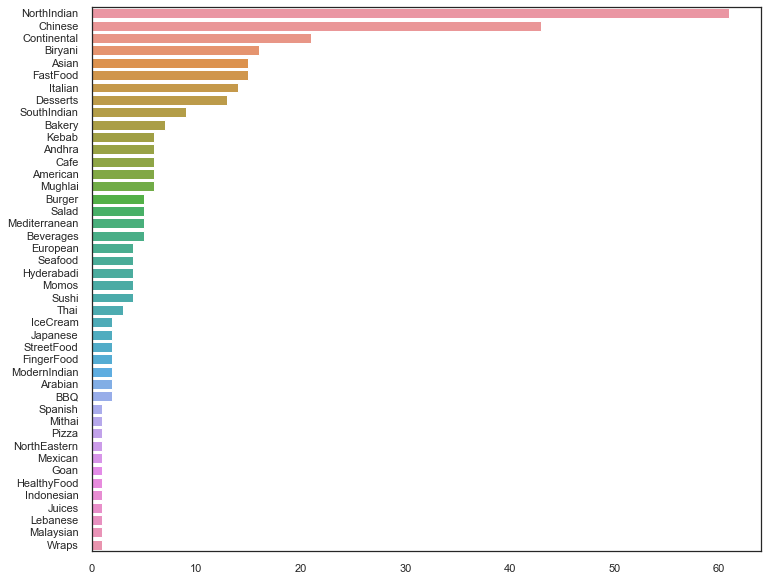

In [98]:
plt.figure(figsize = (12,10))
sns.set_style('white')
sns.barplot(y = df_rest.drop(['Name','Cost'],axis = 1).sum().sort_values(ascending=False).index,x = df_rest.drop(['Name','Cost'],axis = 1).sum().sort_values(ascending=False))

## North Indian, Continental, Chisene tops the cuisine count.

## Merging the two dataframes

 SO that we can add the average ratings of the restaurants also

In [99]:
df_reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [100]:
df_reviews['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

## All of the cols where rating is NaN

In [101]:
df_reviews[~df_reviews['Rating'].isin(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'])]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8782,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8783,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8784,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8785,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8786,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


In [102]:
df_reviews.dropna(subset = ['Rating'],inplace=True)

In [103]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9962 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9962 non-null   object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    9962 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 622.6+ KB


## There was one rating as 'Like', changing it to 4

In [104]:
df_reviews['Rating'] = df_reviews['Rating'].replace('Like','4')

In [105]:
# Changing ratings to float
df_reviews['Rating'] = df_reviews['Rating'].astype('float')

# Dropping null values for reviews also, as there are 7 null values remaining.

In [106]:
df_reviews.dropna(subset = ['Review'],inplace=True)

In [107]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9955 non-null   object 
 1   Reviewer    9955 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9955 non-null   float64
 4   Metadata    9955 non-null   object 
 5   Time        9955 non-null   object 
 6   Pictures    9955 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 622.2+ KB


## Creating a new df to get the average ratings for each Restaurant

In [108]:
df_ratings = df_reviews.groupby('Restaurant')['Rating'].mean().reset_index()

In [109]:
df_ratings.sort_values(by='Rating',ascending = False).head(15)

,Restaurant,Rating
3,AB's - Absolute Barbecues,4.880
11,B-Dubs,4.810
2,"3B's - Buddies, Bar & Barbecue",4.760
67,Paradise,4.700
35,Flechazo,4.660
87,The Indi Grill,4.600
97,Zega - Sheraton Hyderabad Hotel,4.450
64,Over The Moon Brew Company,4.340
16,Beyond Flavours,4.280
19,Cascade - Radisson Hyderabad Hitec City,4.260


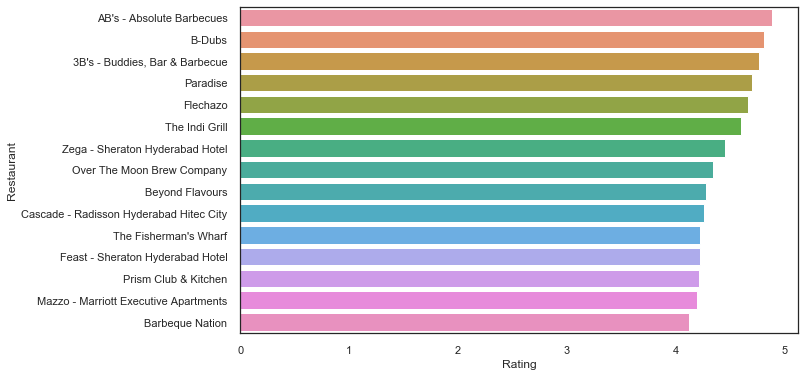

In [110]:
plt.figure(figsize = (10,6))
sns.barplot(y =df_ratings.sort_values(by='Rating',ascending = False).head(15)['Restaurant'] , x = df_ratings.sort_values(by='Rating',ascending = False).head(15)['Rating'])

## Clustering the restaurants

## Merging both the DataFrames for clustering

In [111]:
df_cluster = df_rest.merge(df_ratings, left_on='Name',right_on='Restaurant')

In [112]:
df_cluster.head()

,Name,Cost,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,...,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps,Restaurant,Rating
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,Beyond Flavours,4.28
1,Paradise,800,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,Paradise,4.70
2,Flechazo,1300,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Flechazo,4.66
3,Shah Ghouse Hotel & Restaurant,800,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,Shah Ghouse Hotel & Restaurant,3.21
4,Over The Moon Brew Company,1200,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Over The Moon Brew Company,4.34


# Changing the order of the columns

In [113]:
df_cluster = df_cluster[['Name', 'Cost','Rating', 'American', 'Andhra', 'Arabian', 'Asian', 'BBQ',
       'Bakery', 'Beverages', 'Biryani', 'Burger', 'Cafe', 'Chinese',
       'Continental', 'Desserts', 'European', 'FastFood', 'FingerFood', 'Goan',
       'HealthyFood', 'Hyderabadi', 'IceCream', 'Indonesian', 'Italian',
       'Japanese', 'Juices', 'Kebab', 'Lebanese', 'Malaysian', 'Mediterranean',
       'Mexican', 'Mithai', 'ModernIndian', 'Momos', 'Mughlai', 'NorthEastern',
       'NorthIndian', 'Pizza', 'Salad', 'Seafood', 'SouthIndian', 'Spanish',
       'StreetFood', 'Sushi', 'Thai', 'Wraps']]

In [114]:
df_cluster.rename(columns={'Rating':'Avg_rating'},inplace=True)

In [115]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype           
---  ------         --------------  -----           
 0   Name           100 non-null    object          
 1   Cost           100 non-null    int32           
 2   Avg_rating     100 non-null    float64         
 3   American       100 non-null    Sparse[int32, 0]
 4   Andhra         100 non-null    Sparse[int32, 0]
 5   Arabian        100 non-null    Sparse[int32, 0]
 6   Asian          100 non-null    Sparse[int32, 0]
 7   BBQ            100 non-null    Sparse[int32, 0]
 8   Bakery         100 non-null    Sparse[int32, 0]
 9   Beverages      100 non-null    Sparse[int32, 0]
 10  Biryani        100 non-null    Sparse[int32, 0]
 11  Burger         100 non-null    Sparse[int32, 0]
 12  Cafe           100 non-null    Sparse[int32, 0]
 13  Chinese        100 non-null    Sparse[int32, 0]
 14  Continental    100 non-null    Sparse[int32

## EDA for Ratings and Cost

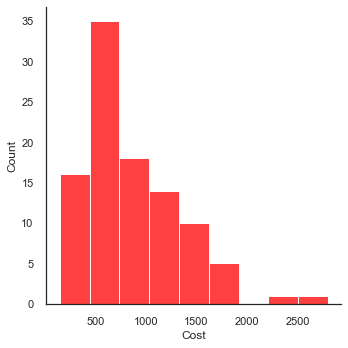

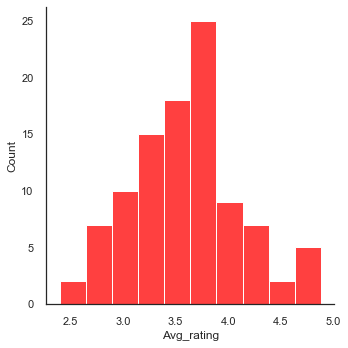

In [116]:
for col in ['Cost','Avg_rating']:
  sns.displot(df_cluster[col],color='red')

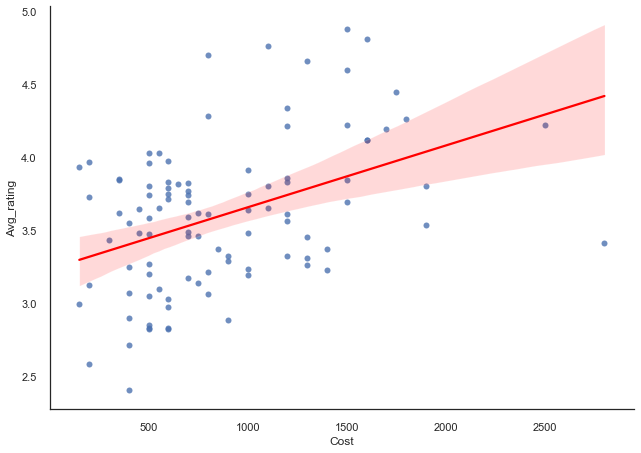

In [117]:
sns.lmplot(y='Avg_rating',x='Cost',data=df_cluster,line_kws={'color' :'red'},height=6.27, aspect=11.7/8.27)

## WE can already see some kind of a positive correlation bw cost and rating

# Building our model

In [118]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [119]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

## Scaling our data

In [120]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_cluster.drop('Name',axis =1))

## KMeans Clustering

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

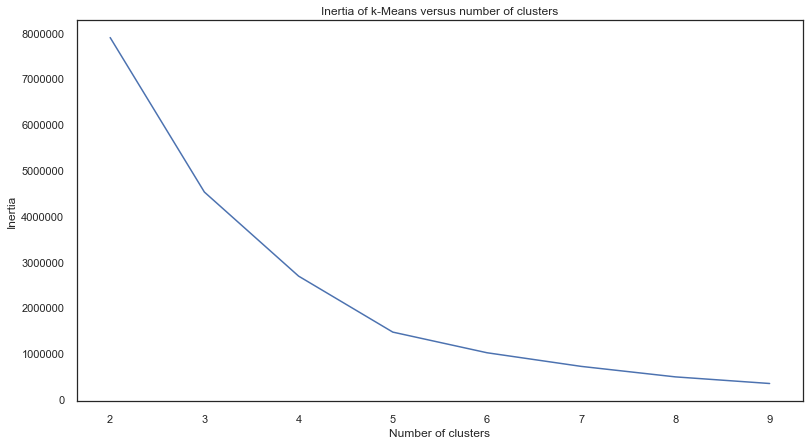

In [121]:
scores = [KMeans(n_clusters=i+2, random_state=11).fit(df_cluster.drop('Name',axis =1)).inertia_ 
          for i in range(8)]
plt.figure(figsize=(13,7))
sns.lineplot(np.arange(2, 10), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

## It seems that 5 clusters are the optimal clusters.

Fitting 5 clusters to the model

In [122]:
model = KMeans(random_state=11, n_clusters=5)
model.fit(df_cluster.drop('Name',axis =1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=11, tol=0.0001, verbose=0)

In [123]:
cluster_labels = model.predict(df_cluster.drop('Name',axis =1))

In [124]:
# Making label column
df_cluster['labels'] = cluster_labels

Text(0.5, 0, 'Cost')

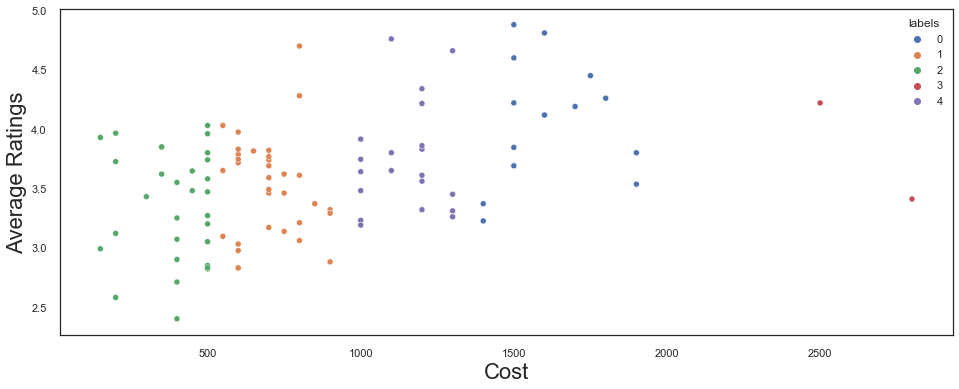

In [125]:
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(y='Avg_rating',x='Cost',data=df_cluster,hue='labels', palette = 'deep')
plt.ylabel('Average Ratings',fontdict={'size':22})
plt.xlabel('Cost',fontdict={'size':22})

## As we can see here that the Restaurants have clustered well accross the cost. All the clusters are neatly separated.

## Some Analysis on the Clusters.

Cluster 3 seems to be the most expensive restaurants. There are two restaurants lets look at them

In [126]:
df_cluster[df_cluster['labels'] == 3]

,Name,Cost,Avg_rating,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,...,Pizza,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps,labels
56,Feast - Sheraton Hyderabad Hotel,2500,4.22,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
92,Collage - Hyatt Hyderabad Gachibowli,2800,3.41,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3


## The Most expensive restaurant is rated around 3.4, and the second most expensive is rated 4.2. Both of them serve Asian,Continental,Italian and Indian Cuisines.

# Comparing Restaurants bw North Indian and Chinese Cuisines.

In [127]:
df_north = df_cluster[( df_cluster['NorthIndian'] == 1 )]
df_chinese = df_cluster[ ( df_cluster['Chinese'] == 1 ) ]

In [128]:
print(df_north.labels.value_counts())
df_chinese.labels.value_counts()

1    19
2    15
4    14
0    11
3     1
Name: labels, dtype: int64


1    18
4     9
2     9
0     4
3     1
Name: labels, dtype: int64

In [129]:
north = pd.DataFrame({'NorthIndian' : [16,18,14,11,1]},index=[0, 2 , 4, 1, 3] )
chinese = pd.DataFrame({'Chinese': [9,18,9,4,1]},index=[0, 2 , 4, 1, 3] )

Text(0, 0.5, 'No of restaurants')

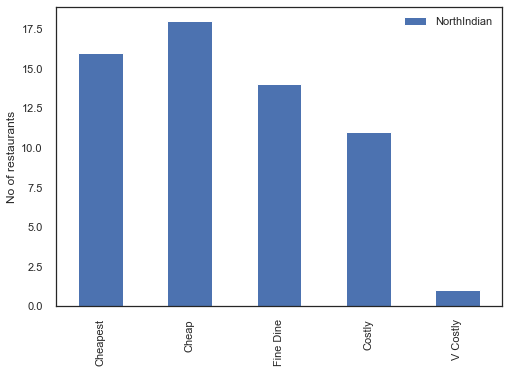

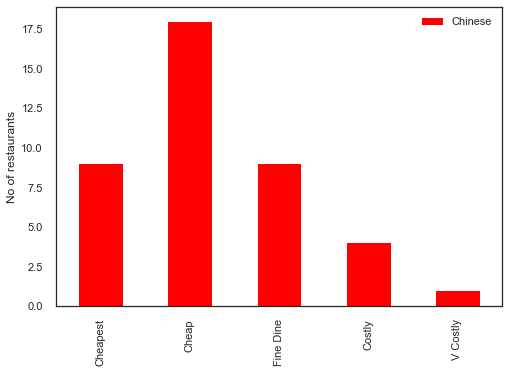

In [130]:
north.plot(kind= 'bar',)
plt.xticks([0,1,2,3,4], labels=['Cheapest','Cheap','Fine Dine','Costly','V Costly'])
plt.ylabel('No of restaurants')
chinese.plot(kind='bar',color='red')
plt.xticks([0,1,2,3,4], labels=['Cheapest','Cheap','Fine Dine','Costly','V Costly'])
plt.ylabel('No of restaurants')

## The Distribution of cost is somewhat similar between NorthIndian and Chinese.
This could be interesting while introducing a new menu line.

## Sentiment Analysis

## Merging the DataFrames for Sentiment Analysis

In [131]:
df = df_reviews.merge(df_rest,left_on='Restaurant',right_on='Name')

In [132]:
df = df[['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Cost']]

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9954
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9955 non-null   object 
 1   Reviewer    9955 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9955 non-null   float64
 4   Metadata    9955 non-null   object 
 5   Time        9955 non-null   object 
 6   Pictures    9955 non-null   int64  
 7   Cost        9955 non-null   int32  
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 661.1+ KB


In [134]:
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Cost
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,800
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,800
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,800
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,800
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,800


# Handling Metadata for reviewers

In [135]:
# Function to split the meta data into reviews count and followers count
def meta_split(row):
    reviews = int(row.split(',')[0].split()[0])
    try :
        followers = int(row.split(',')[1].split()[0])
    except:
        followers = 0
    return reviews,followers

In [136]:
#Dividing Metadata into reviews and followers column
df['Reviews'],df['Followers'] = zip(*df['Metadata'].map(meta_split))

#Dropping metadata
df = df.drop('Metadata',axis=1)

In [137]:
df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Cost,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0,800,1,2
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0,800,3,2
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0,800,2,3
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0,800,1,1
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0,800,3,2


## Text preprocessing for reviews

In [138]:
from nltk.corpus import stopwords
import string

#storing punctuation marks and digits
removable = string.punctuation + string.digits

#English stopwords
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such",  "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
# Function for preprocessing on reviews
def reviews_processing(review):
    
    #converting the text to lowercase
    review = review.lower()
    
    #removing punctuation marks and digits
    dct = review.maketrans('','',removable)
    review = review.translate(dct)
    
    #removing stopwords from the review
    review = ' '.join(i for i in review.split() if i not in stop_words)
    return review

We had to customise the stopwords because in the library nltk some words like 'not' are also removed, which are crucial for sentiment analysis.

## Applying Text processing on the columns with customised stop-words

In [139]:
df['Review'] = df['Review'].apply(reviews_processing)

## Pictures and ratings correlation

In [140]:
#Storing top restaurants sorted by rating
pic_ratings = df.groupby('Pictures')['Rating'].mean().reset_index().sort_values(by='Pictures')[:40]
pic_ratings.columns=['Pictures','avg_rating']

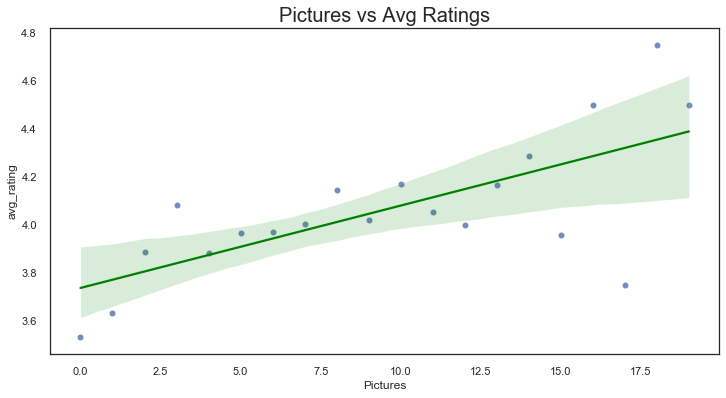

In [141]:
plt.figure(figsize=(12,6))
#sns.scatterplot(data=pic_ratings[:20], x='Pictures', y='avg_rating')
sns.regplot(data=pic_ratings[:20] , x='Pictures', y='avg_rating',line_kws={'color':'green'})
plt.title('Pictures vs Avg Ratings',fontdict={'size':20})
plt.show()

## Critics Analysis

In [142]:
by_reviews = df.groupby(['Reviewer','Followers','Reviews'])['Rating'].mean().reset_index().sort_values(by=['Reviews','Followers'],ascending=False)
by_reviews.columns=['Reviewer','Followers','Reviews','avg_ratings']
by_reviews['rating_range'] = pd.cut(by_reviews['avg_ratings'], [0,2.5,3,3.5,4,4.5,5], labels=['<2.5','<3','<3.5','<4','<4.5','<5'])
by_reviews.head(10)

,Reviewer,Followers,Reviews,avg_ratings,rating_range
833,Anvesh Chowdary,1654,1031,3.333333,<3.5
7909,ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,794,685,2.000000,<2.5
80,Abc098,2275,665,3.000000,<3
3451,Mithun Ravindranathan,2863,560,4.000000,<4
3498,Mohd Zubair Ali (Hyderabad.Food.Diaries),1688,482,4.000000,<4
1262,Bhargava Krishna,1302,472,3.500000,<3.5
1836,Epicurean Tales,2464,452,4.000000,<4
4653,Raghu,1016,443,3.416667,<3.5
63,Aarti Kamath,5451,417,4.500000,<4.5
6174,Shrishail Deshnur,1047,414,3.500000,<3.5


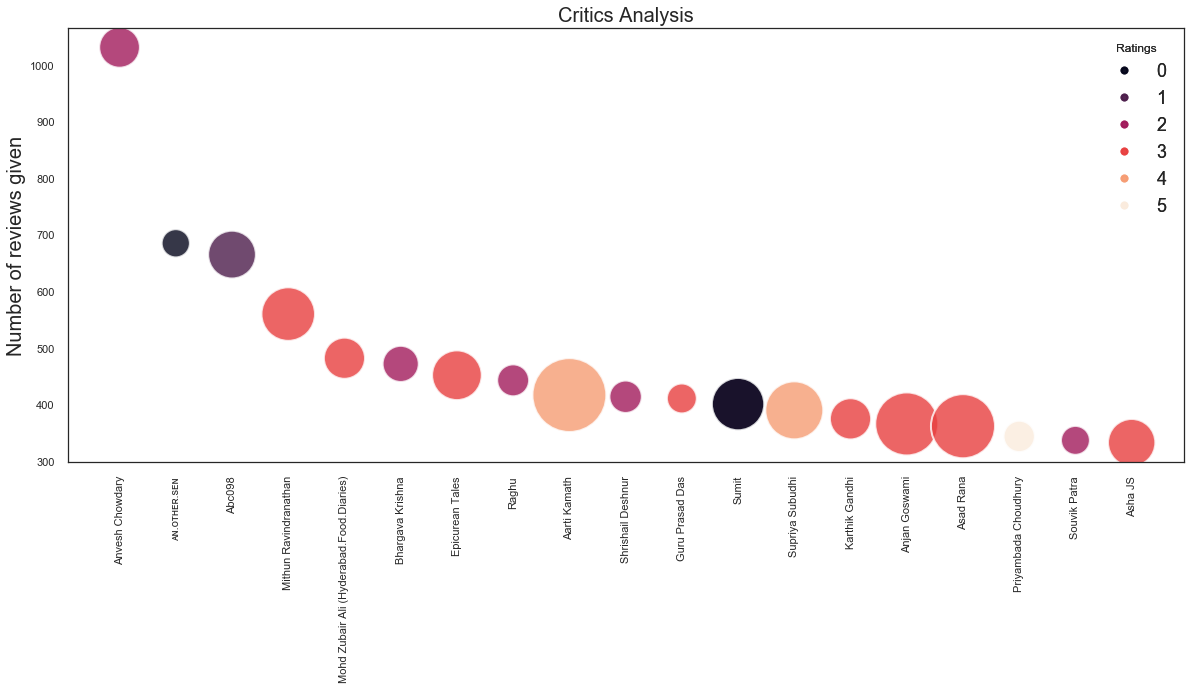

In [145]:
fig, ax = plt.subplots(figsize = (20,8))
scatter = ax.scatter(
    x = by_reviews['Reviewer'][:20] , 
    y = by_reviews['Reviews'][:20], 
    s = by_reviews['Followers'][:20], 
    c = by_reviews['rating_range'][:20].cat.codes, 
    alpha=0.8, 
    edgecolors="white", 
    linewidth=2);

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Ratings",fontsize=18)
ax.add_artist(legend1)
plt.ylabel('Number of reviews given',fontdict={'size':20})
plt.title('Critics Analysis',fontdict={'size':20})
plt.xticks(rotation='vertical')
plt.show()

* The most experienced critics based on their number of reviews given in order
* Size represents their followers
* Respective colors represnt the avg ratings
* Their reviews can give a big impact on our restaurant

Anvesh Chowdhary has most reviews and Aarti Kamath has most followers the chart.

## Frequently Used Words

Creating a function to return a DataFrame of sentiments associated with words or phrases even.(The count of words is given by n)

In [146]:
from sklearn.feature_extraction.text import CountVectorizer
def most_used_words(sentiment,n):
    #positive sentiment = ratings with 4,5
    #negative sentiment = ratings with 1,2
    #neutral sentiment = ratings with 3
    sentiments = {1:[4,5,'Positive '],0:[3,3.5,'Neutral '],-1:[1,2.5,'Negative ']}
    df1 = df[(df['Rating']>=sentiments[sentiment][0]) & (df['Rating']<=sentiments[sentiment][1])]
    #converts words into vectors based on count
    cv = CountVectorizer(ngram_range= (n,n))
    total_words = cv.fit_transform(df1['Review'])
    
    #Will count the total number if occurances of each word in all reviews
    count = total_words.sum(axis = 0)
    
    #storing and sorting them in a list of tuples
    freq_df = pd.DataFrame((word, count[0, idx]) for word, idx in cv.vocabulary_.items())
    freq_df.columns=[sentiments[sentiment][2]+'Words','Frequency']
    freq_df = freq_df.sort_values(by='Frequency',ascending=False)
    
    return freq_df.reset_index().drop('index',axis=1)

In [147]:
pos_df1 = most_used_words(1,1)
pos_df2 = most_used_words(1,2)
pos_df3 = most_used_words(1,3)
neu_df3 = most_used_words(0,3)
neg_df1 = most_used_words(-1,1)
neg_df2 = most_used_words(-1,2)
neg_df3 = most_used_words(-1,3)

This is an example of postive and negative 3 word phrases.

In [148]:
pd.concat([neg_df3['Negative Words'][:15] ,pos_df3['Positive Words'][:15]],axis=1)

,Negative Words,Positive Words
0,food not good,must visit place
1,taste not good,place hangout friends
2,worst experience ever,north indian food
3,not upto mark,veg non veg
4,also not good,good place hangout
5,not worth money,food really good
6,ordered chicken biryani,overall good experience
7,not cooked properly,food good service
8,would not recommend,good food good
9,veg non veg,one best places


## Function to create a word cloud

In [149]:
from wordcloud import WordCloud

#Function for plotting wordcloud
def create_cloud(data,sentiment):
    
    #colors for different sentiments
    color = ['Blues','Greens','Reds']
    
    #total list of words in the reviews column
    word_list=list(data.iloc[:,0][:100])
    
    #storing all of them in a single string
    strr=''
    for i in word_list:
        i=i.replace(' ','')
        strr=strr+i+' '
    
    #creating a wordcloud
    wordcloud = WordCloud(width = 2400, height = 1200, 
                    background_color ='white',  
                    min_font_size = 12,colormap=color[sentiment]).generate(strr)
    plt.figure(figsize = (20,8), facecolor = 'black') 
    plt.imshow(wordcloud)
    if sentiment == 1:
      plt.title('Positive Phrases',fontdict={'color':'white','size':25})
    else:
      plt.title('Negative Phrases',fontdict={'color':'white','size':25})
    plt.axis('off')

## World cloud for positive and negative trigrams

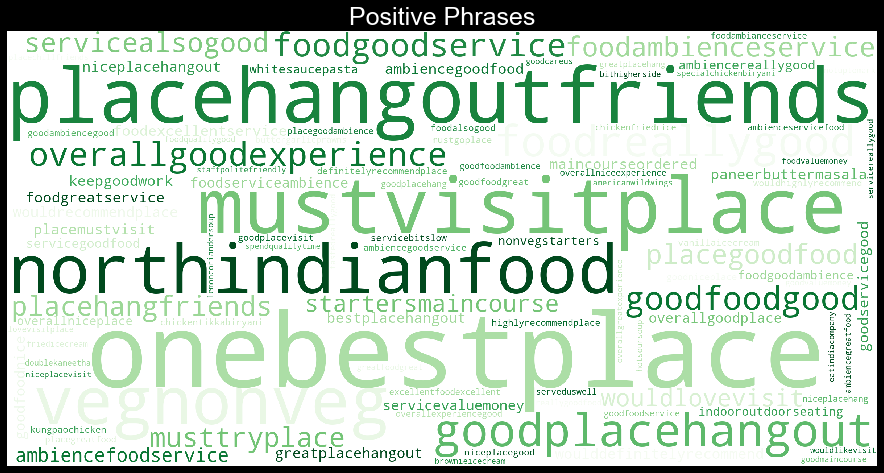

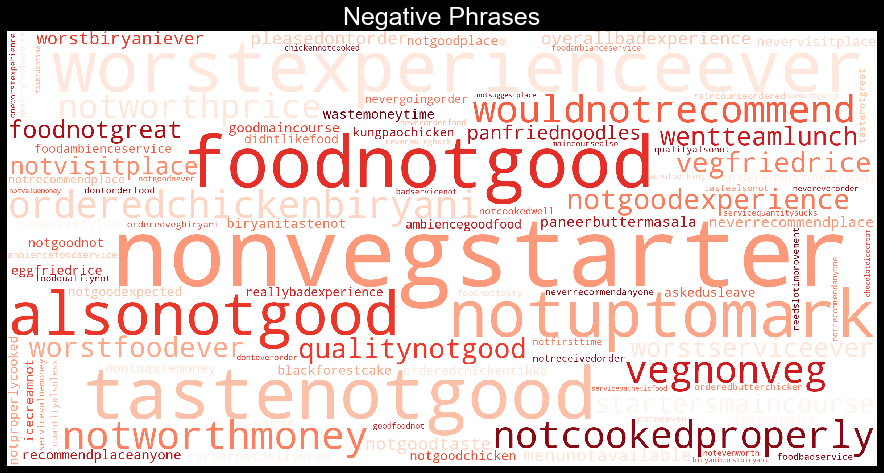

In [150]:
df_list = [pos_df3, neg_df3]
for i in [0,1]:
  if i == 0:
    create_cloud(df_list[i],1)
  else:
    create_cloud(df_list[i],-1)

## Function to get a sentiment score for the phrases independent from the ratings provided in the data

In [151]:
from textblob import TextBlob as tb
#Function to get sentiment score
def get_sentiment_score(review):
    return round(tb(review).sentiment.polarity,2)

#To classify them as Positive or negative or neutral
def get_sentiment(review):
    score = get_sentiment_score(review)
    if score :
        if score > 0:
            return 'Positive'
        else :
            return 'Negative'
    else:
        return 'Neutral'
    
# Customized scalar for sentiment score
def scaler(lst):
    lst1 = []
    mini = min(lst)
    maxi = max(lst)
    for i in lst:
        lst1.append(round(((i-mini)/(maxi-mini))*4+1,2))
    return lst1
df['sentiment_score'] = df['Review'].apply(get_sentiment_score)
df['Sentiment'] = df['Review'].apply(get_sentiment)

In [152]:
# Storing avg_ratings and avg sentimentscores of restaurants on same scale of 1-5
sentiment_df = df.groupby('Restaurant')[['sentiment_score','Rating']].mean().reset_index()
sentiment_df.columns = ['Restaurant','avg_sentiment','avg_rating']
sentiment_df['avg_sentiment'] = scaler(list(sentiment_df['avg_sentiment']))
sentiment_df['avg_rating'] = scaler(list(sentiment_df['avg_rating']))

## Plotting the avg_sentiment_score vs avg_rating

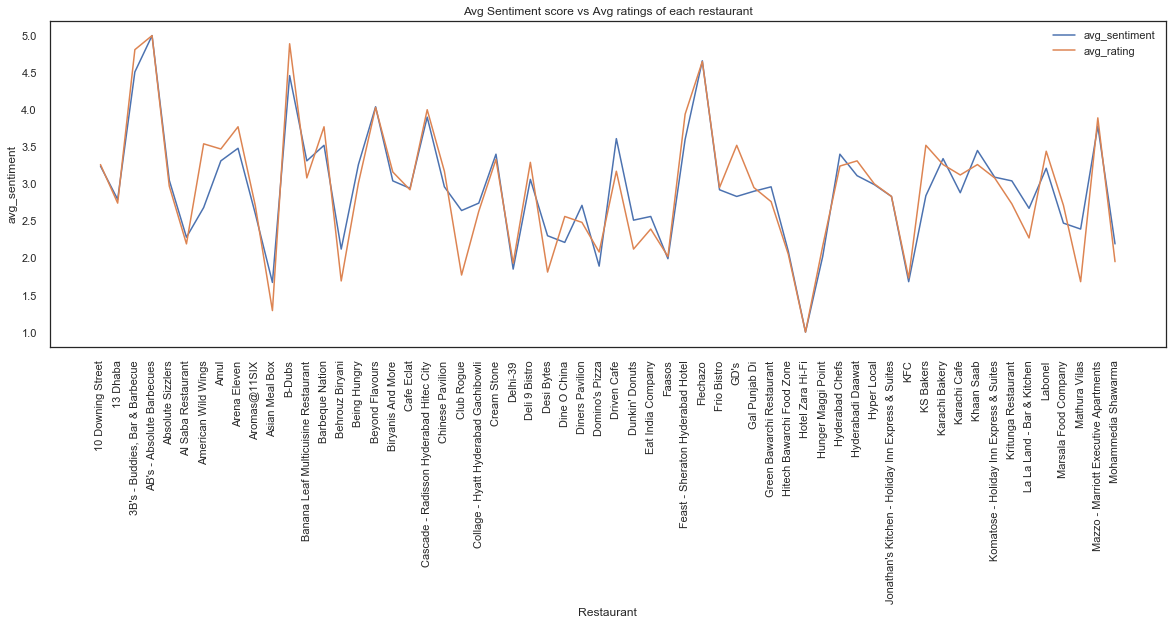

In [153]:
plt.figure(figsize=(20,6))
sns.lineplot(x = sentiment_df['Restaurant'][:60] ,y = sentiment_df['avg_sentiment'][:60])
sns.lineplot(x = sentiment_df['Restaurant'][:60],y = sentiment_df['avg_rating'][:60])
plt.xticks(rotation='vertical')
plt.title('Avg Sentiment score vs Avg ratings of each restaurant')
plt.legend(['avg_sentiment', 'avg_rating'])
plt.show()

## We can see here that sentiment score from our function and Rating from the dataset follow closely.
## But there are some caveats also as we can see some ratings are higher but the sentiment not as high and some sentiments are lower but the ratings are not as low.
We try to explain them as follows
* Here we can observe that some of the critics gave low ratings and positive reviews
* It may caused because of the difference between individual perspective
* Some may give 3 for the best experience and same 3 by some who does'nt satisfied



# Business Perspective
* Few people gave 1-3 ratings although the food tastes good.
* But just because of delivery/ packing issues etc
* So it is better to store ratings for individual category like delivery, packaging, food etc